# Lesson - Statistics and Probability XI: Probability Estimation

Estimating probabilities is an extremely powerful technique that can enable us to build non-trivial applications, including:

- Image recognition systems (used for self-driving cars, medical diagnosis, etc.)
- Spam filters for inboxes
- Statistical hypothesis tests

### Empirical Probability
Whenever we can't predict outcomes with certainty, we're dealing with a **random experiment**. The toss of a coin is a random experiment, just like drawing lottery numbers or rolling a die - — a random experiment is any process for which we can't predict outcomes with certainty.

Although we can't predict the outcome of a random experiment, we can at least estimate the probability (the chances) associated with its outcomes. A coin toss has two possible outcomes, and we can estimate the probability associated with the coin landing on heads or tails.

Let's say we're interested in estimating the probability of a coin landing on heads. To estimate the probability, we can take the following steps:

- Toss the coin many times (thus repeating the random experiment).
- Count the number of times the coin landed on heads.
- Divide the number of heads by the total number of times we tossed the coin.
Dividing the number of heads by the total number of times we tossed the coin gives us the probability of a coin landing heads up. Let's say we tossed a coin 100 times and got heads 56 times. We find the probability of a coin landing heads up by dividing the number of heads (56) by the total number of times we tossed the coin (100). This is 56/100 = 0.56, so the probability of a coin landing heads up is 0.56.

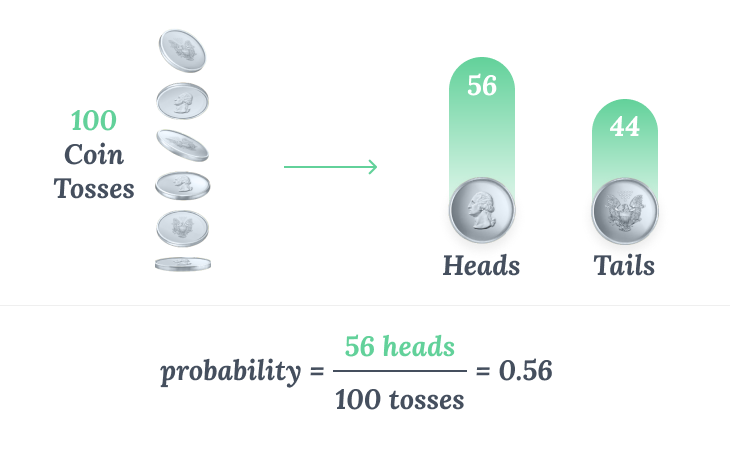

In probability notation, we could write this as:

$$\begin{equation}
\text{Probability(coin lands heads up)} = 0.56
\end{equation}$$

We read the mathematical expression above as "the probability of the event coin lands heads up is 0.56." For simplicity, the notation is often compressed, and "Probability" becomes "P", while "coin lands heads up" becomes simply "heads" or H:

$$\begin{equation}
P(H) = 0.56
\end{equation}$$

In other resources, you may find a slightly different notation, like p(H) or Pr(H), but P(H) is generally preferred.

Generally, for any event E (like a coin landing heads up), we can find its probability by using the following formula:

$$\begin{equation}
P(E) = \frac{\text{number of times event E happened}}{\text{number of times we repeated the experiment}}
\end{equation}$$

When we calculate the probability of an event by performing an experiment one or more times, we calculate the **experimental** — or **empirical** probability — of the event.



**Exercise**

-We tossed a coin 100 times and got heads 56 times. 
- Calculate the probability of getting tails using the formula above and assign the result to `p_tail`.
We rolled a regular six-sided die 200 times and:
- We got a six 28 times. Calculate the probability of getting a 6 when rolling a six-sided die. Assign the result to `p_six`.
We got an odd number (a 1, a 3, or a 5) 102 times. 
- Calculate the probability of getting an odd number when rolling a six-sided die. Assign the result to `p_odd`.
Print `p_tail`, `p_six`, and `p_odd` to examine the probabilities.

In [1]:
# Probability of tossing a coin

p_tail = (100-56) / 100

# Probability of rolling a dice

p_six = 28/ 200

p_odd = 102/ 200

print (p_tail, p_six, p_odd)

0.44 0.14 0.51


### Probability as Relative Frequency

Above, we divided the number of heads by the number of times we tossed the coin to find the empirical probability of H (coin lands heads up):
$$\begin{equation}
P(H) = \frac{56 \text{ heads}}{100 \text{ tosses}} = 0.56
\end{equation}$$

Notice, however, that 0.56 represents the proportion of heads from the total number of tosses which when converted to percentages is 56%.

This tells us that the empirical probability of an event is nothing but the **relative frequency** (proportion or percentage) of that event with respect to the total number of times the experiment was performed.

Using percentages gives us a more intuitive understanding of what a probability value really is. For instance, P(H) = 56% tells us that for any coin toss, there's a 56% chance the coin will land heads up. So just before we're about to toss a coin, we may not be able to predict the outcome, but at least we know there's a 56% chance the coin will land heads up.

**Exercise**

We tossed a coin 300 times and got tails 162 times.
- Find the probability of getting heads. Assign your result to `p_heads_1`.
- Transform the probability in `p_heads_1` to a percentage value. Assign the result to `percentage_1`.

In a different trial, we tossed a coin 5,000 times and got tails 2,450 times.
- Find the probability of getting heads. Assign your result to `p_heads_2`.
- Transform the probability in p_heads_2 to a percentage value. Assign the result to `percentage_2`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [3]:
p_heads_1 = (300 - 162) / 300
percentage_1 = p_heads_1 * 100

p_heads_2 = (5000 - 2450) / 5000
percentage_2 = p_heads_2 * 100

print (percentage_1, percentage_2)

46.0 51.0


## Repeating an Experiment

we tossed a coin 300 times, and found that P(H) = 46%. Then, we tossed a coin 5,000 times and found that P(H) = 51%. But if different number of tosses give different probability values, then what's the true value of P(H)?

To answer this question, we're going to do a thought experiment where we assume we already know that the true probability of P(H) is 50%. We'll also assume the chances are the same for getting tails, so P(T) = 50% (P(T) is an abbreviation for P(Tails)).

Using these assumptions, we're going to use Python to simulate a coin toss 10,000 times and watch how P(H) evolves as the number of tosses increases. We begin by writing a function named `coin_toss()` that can simulate a single coin toss:

In the code below:

- We will use the `seed()` [function](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html) to set a random seed for reproducibility

- We will use the `randint(0, 2)` [function](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html) to generate randomly either a 0 or a 1 (2 won't be included). Because randint() generates numbers randomly, there's a 50% chance to get a 0 and 50% chance to get a 1 — this helps us introduce in our code a logic for P(H) = 50% and P(T) = 50%.
- If randint(0, 2) returns 1, our `coin_toss()` function returns `'HEAD'`, otherwise it returns `'TAIL'`

In [4]:
def coin_toss():
    np.random.seed(1)
    if np.random.randint(0,2) == 1:
        return 'Head'
    else:
        return 'Tail'
    
coin_toss()     


'Head'

We will repeat the experiment 10,000 times in the exercise below and then analyze how P(H) evolves as the number of tosses increases.

**Exercise**

Repeat the coin toss 10,000 times, and for each toss save the value of P(H) up to that point. 

For each of the 10,000 iterations of a for loop:

- Save the outcome of the `coin_toss()` function to a variable named `outcome`.
- If `outcome` stores the string `'HEAD'`, then increase the value of `heads` by 1.
- Divide `heads` by `n` to get the current value of `P(H)`. Assign the value to `current_probability`.

`n` comes from for n in `range(1, 10001)`
- Append `current_probability` to the list `probabilities`. The probabilities should be expressed as proportions, not percentages.
Print the first and last 10 values in `probabilities` to inspect the evolution of `P(H)`.

In [5]:
from numpy.random import seed, randint

seed(1) # seed generator with a random_state
def coin_toss():
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'


probabilities = []
heads = 0

for n in range(1, 10001):
    outcome = coin_toss()
    if outcome == 'HEAD':
        heads += 1
    current_probability = heads / n
    probabilities.append(current_probability)
    


print(probabilities[:10])
print(probabilities[-10:])

[1.0, 1.0, 0.6666666666666666, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.75, 0.7777777777777778, 0.7]
[0.4993494144730257, 0.49939951961569257, 0.4993495446812769, 0.4993996397838703, 0.4993496748374187, 0.4992997198879552, 0.49934980494148246, 0.4993998799759952, 0.49934993499349933, 0.4994]


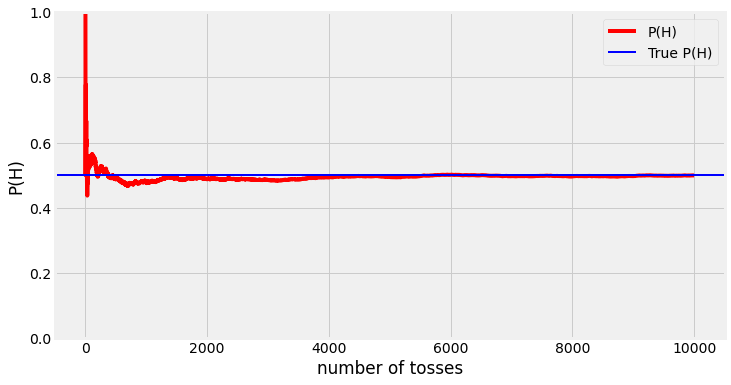

In [6]:
fig = plt.figure(figsize=(12, 6))  
plt.style.use('fivethirtyeight')

plt.plot(probabilities, color = 'red', label = 'P(H)')
plt.ylim (0, 1)
plt.xlabel('number of tosses')
plt.ylabel('P(H)')
plt.axhline(y = 0.5, color = 'blue', linewidth = 2, label = 'True P(H)')
plt.legend()
plt.show()

### The True Probbility Value

The line plot above, shows the evolution of P(H) as the number of coin tosses increases. 

Above, we see that for the first 1,000 tosses or so, the value of P(H) varies a lot, with a maximum of 1.0 and a minimum of approximately 0.45. However, as the number of tosses increases, the value of P(H) tends to stabilize.

Interestingly enough, P(H) stabilizes around the true value of P(H), which we assumed to be P(H) = 50% = 0.50. This suggests that the greater the number of coin tosses, the closer P(H) gets to the true value. If we take a look at the last few probabilities and round them all to two decimal places, we can see the values are all 0.50 (the values below are not yet rounded to two decimal places):

In [7]:
probabilities[-5:]

[0.4992997198879552,
 0.49934980494148246,
 0.4993998799759952,
 0.49934993499349933,
 0.4994]

This gives us some insight into our initial question, which was: if different numbers of tosses give different probability values, then what's the true value of P(H)? The true P(H) is given by the relative frequency (expressed as proportion or percentage) of heads as the number of coin tosses increases without bound — the more we repeat the toss, the closer we should be to the true probability.

Generally, the probability of an event (a coin landing heads up, getting a 5 when we roll a die, etc.) approaches the true probability value as the number of trials of the random experiment (a coin toss, the rolling of a die, etc.) increases without bound.

**Exercise**

An insurance company conducted a study with 200 individuals, and found that:

- 87 individuals opted for at least a life insurance policy.
- 40 individuals opted for at least life and car insurance policies.
- 63 individuals opted for at least a house insurance policy.
- 160 individuals opted for at least one type of insurance policy.

We can't predict people's choices with certainty, so an individual choosing to buy an insurance policy is a random experiment. 200 individuals were part of the study, so we can consider the random experiment was performed 200 times. Find:

- `P(L)`: The probability that a new customer opts for at least a life insurance. Assign answer to a variable named `p_l`.
- `P(L and C)`: The probability that an individual opts for at least a life and a car insurance policy. Assign answer to a variable named `p_l_and_c`.
- `P(H)`: The probability that an individual opts for at least a house insurance policy. Assign your answer to a variable named `p_h`.
- `P(NO)`: The probability that an individual opts for no insurance at all. Assign your answer to a variable named `p_no`.

In [8]:
def get_probability(n, N):
    probability = n/ N
    return probability
    
p_l = get_probability(87, 200)
p_l_and_c = get_probability(40, 200)
p_h = get_probability(63, 200)
p_no = get_probability(200 - 160, 200)

print(p_l, p_l_and_c, p_h, p_no)
    

0.435 0.2 0.315 0.2


### Theoretical Probability

So far, we have seen we need to perform an experiment to estimate probability values. We also saw that a probability value estimated by performing an experiment is called empirical (or experimental) probability. To find the empirical probability of any event E (like a coin landing heads up), we used the formula:

$$\begin{equation}
P(E) = \frac{\text{number of times event E happened}}{\text{number of times we repeated the experiment}}
\end{equation$$

However, properly calculating empirical probabilities requires us to perform a random experiment many times, which may not always be feasible in practice. An easier way to estimate probabilities is to start with the assumption that the outcomes of a random experiment have equal chances of occurring. This allows us to use the following formula to calculate the probability of an event E:

$$\begin{equation}
P(E) = \frac{1}{\text{total number of possible outcomes}}
\end{equation}$$

For instance, the total number of **possible outcomes** for a coin toss is two: heads or tails. Let H be the event that a coin lands on heads, and T the event that a coin lands on tails. We can use the formula above to find P(H) and P(T):

$$\begin{equation}
P(H) = \frac{1}{2} = 0.5
\end{equation}$$

$$\begin{equation}
P(T) = \frac{1}{2} = 0.5
\end{equation}$$

Let's also consider the rolling of a die, where there are six possible outcomes: 1, 2, 3, 4, 5 or 6. Assuming each outcome has the same chance of occurring, the probability of getting a 2 or a 4 is:

$$\begin{equation}
P(2) = \frac{1}{6} = 0.1\bar{6}
\end{equation}$$

$$\begin{equation}
P(4) = \frac{1}{6} = 0.1\bar{6}
\end{equation}$$

When we calculate the probability of an event under the assumption that the outcomes have equal chances of occurring, we say that we're calculating the **theoretical probability** of an event.

Theoretical probabilities are much easier to calculate, but in practice it doesn't always make sense to assume the outcomes of a random experiment have equal chances of occurring. If we were playing the lottery, it wouldn't be reasonable to assume that the two possible outcomes (we win or we don't) have equal chances.

If we were a scientist trying to calculate the probability of a human becoming infected with the HIV virus, it wouldn't be reasonable to assume the two possible outcomes (becoming infected with HIV or not) have equal chances of occurring. Both theoretical and empirical probabilities are helpful and important in practice.

**Exercise**

- Find the theoretical probability of getting a 5 when rolling a six-sided die. Assign answer to `p_5`.
Tossing a coin twice has four possible outcomes (assume all the outcomes are equally likely):
- Heads on the first toss and heads on the second toss (HH).
- Heads on the first toss and tails on the second (HT).
- Tails on the first toss and heads on the second (TH).
- Tails on the first toss and tails on the second (TT).
Find:
- P(HT): Assign result to `p_ht`.
- P(TT): Assign result to `p_tt`.

In [9]:
def get_theoretical_probability(N):
    probability = 1/ N
    return probability

p_5 = get_theoretical_probability(6)
p_ht = get_theoretical_probability(4)
p_tt = get_theoretical_probability(4)

print(p_5, p_ht, p_tt)

0.16666666666666666 0.25 0.25


### Events versus Outcomes

we've repeatedly used the terms "event" and "outcome," and we need to add a few clarifications. An outcome is any result that a random experiment may terminate in. For instance, all the possible outcomes of rolling a six-sided die are 1, 2, 3, 4, 5, and 6. An event, however, has a richer meaning and can include more than one outcome (or even zero outcomes):

- The event that we'll get an odd number when we roll a six-sided die — this event includes the outcomes 1, 3, and 5.
- The event that we'll get a number less than 5 but greater than 1 when we roll a six-sided die — this event includes the outcomes 2, 3, and 4.
- The event that we'll get a number greater than 20 when we roll a six-sided die — this event doesn't include any of the possible outcomes corresponding to rolling a six-sided die.

Although an event can include a single outcome (like the event of getting a 2 when we roll a die), the two concepts still have a different meaning. We always assign probabilities to events, not outcomes, even if the event includes only one outcome.

We used the formula to compute the theoretical probability of an event:

$$\begin{equation}
P(E) = \frac{1}{\text{total number of possible outcomes}}
\end{equation}$$

However, we can't use this formula to compute theoretical probabilities for events that include more than one outcome. Take the event that we'll get any number between 1 and 6 (both included) when rolling a six-sided die. The outcomes are 1, 2, 3, 4, 5, and 6, so there are 100% chances we'll get some number between 1 and 6. Using our formula, however, we find the probability is only 16/6* 100= 16.66%

To fix this problem, we need to update the formula above to:

$$\begin{equation}
P(E) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}}
\end{equation}$$

The **"number of successful outcomes"** represents the number of outcomes included in the event E, and "total number of possible outcomes" is the number of possible outcomes that the random experiment associated with the event E could terminate in.

The event that we'll get an odd number when we roll a six-sided die includes three successful outcomes (1, 3, and 5), and the random experiment of rolling the die includes six possible outcomes (1, 2, 3, 4, 5, and 6). This means:

$$\begin{equation}
P(\text{odd number}) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}} = \frac{3}{6} = 0.5
\end{equation}$$

Using the updated formula, we also find that the probability of getting a number between 1 and 6 when we roll a die is 100%, just like we'd intuitively expect:

$$\begin{equation}
P(\text{number between 1 and 6}) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}} = \frac{6}{6} = 1 = 100\%
\end{equation}$$

**Exercise**

Assume all the outcomes of rolling a six-sided die have an equal chance of occuring. Calculate as proportion the probability of the following events:
- We get an even number — assign your answer to `p_even`.
- We get an odd number different than 3 — assign your answer to `p_odd_no_3`.
- We get an odd number greater than 5 — assign your answer to `p_odd_greater_5`.

In [10]:
def get_outcome_probability(s, N):
    probability = s/ N
    return probability

p_even = get_outcome_probability(3,6)
p_odd_no_3 = get_outcome_probability(2,6)
p_odd_greater_5 = get_outcome_probability(0,6)

print(p_even, p_odd_no_3, p_odd_greater_5)

0.5 0.3333333333333333 0.0


### A Biased Die

Above we used the following formula to compute theoretical probabilities:

$$\begin{equation}
P(E) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}}
\end{equation}$$

However, let's say we have a biased six-sided die which has a 6 on three of its sides, and 1, 3, and 5 on the rest of the sides.

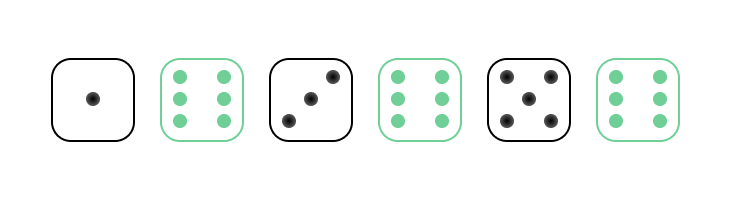

To be able to use the formula above, we need to take into account that 6 shows up on three sides. To do that, we treat each 6 as a different outcome and say that for this biased die the possible outcomes are 1, 3, 5, 6, 6 and 6.

Since we treat each 6 as a different outcome, the event "getting a 6" has three successful outcomes: 6, 6 and 6. This means that the probability of getting a 6 is:

$$\begin{equation}
P(6) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}} =  \frac{3}{6} = 0.5
\end{equation}$$

The event "getting a 3" has only one successful outcome, and the event "getting a 2" has no successful outcome, which leads to:

$$\begin{equation}
P(3) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}} =  \frac{1}{6} = 0.1\bar{6}
\end{equation}$$

$$\begin{equation}
P(2) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}} =  \frac{0}{6} = 0
\end{equation}$$

If we didn't treat each 6 differently and said it doesn't matter which side a 6 is on, we'd be forced to conclude the only possible outcomes are 1, 3, 5 and 6. We can definitely frame the problem like that, but the formula above won't work anymore — we see below P(6) becomes the same as P(3), but, intuitively, P(6) should be higher than P(3) since the die has 6 on three of its sides:

$$\begin{equation}
P(3) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}} = \frac{1}{4} = 0.25
\end{equation}$$

$$\begin{equation}
P(6) = \frac{\text{number of successful outcomes}}{\text{total number of possible outcomes}} = \frac{1}{4} = 0.25 \text{     (wrong)}
\end{equation}$$

The formula doesn't work anymore because **the assumption of equally likely outcomes is violated** — in this case, 6 has more chances of occurring than the other outcomes.

**Exercise**

In a jar of 100 marbles, 90 marbles are red and 10 are blue. Find as a proportion:
- The probability of randomly selecting a blue marble from the jar — assign your answer to `p_blue`.
- The probability of randomly selecting a red marble from the jar — assign your answer to `p_red`.

In [11]:
p_blue = get_outcome_probability(10,100)
p_red = get_outcome_probability(90,100)

print(p_blue, p_red)

0.1 0.9
